## Preprocess and Plot: P2 and P3 Mooring Data from Ross Sea Outflow Experiment (2018-2019)

Data used in this notebook can be accessed [here](https://www.seanoe.org/data/00668/77967/).

In [3]:
# import packages 
import xarray as xr 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.io as sio
import datetime as datetime
import os
import cmocean as cm
%matplotlib inline
from scipy import stats
import gsw

## Preprocess Data 
Get data in good netcdf format to work with 

### Mooring P2

In [45]:
# PATH FOR LOCAL MAC USE 
# ds = xr.open_dataset('/Users/mackenzie/Documents/Research/PhD/TNB_Research/data/P2_P3_2018/113142.nc')

# PATH FOR DELL USE 
ds = xr.open_dataset('/Users/mblan/Documents/TNB_Research/data/P2_P3_2018/113142.nc')

In [46]:
def convert_time(start_time,var,ds):
    """
    """
    base_time = np.datetime64(start_time)

    nanoseconds_per_day = 86_400_000_000_000

    time = base_time + (ds[var].values * nanoseconds_per_day).astype("timedelta64[ns]")

    return time 


In [47]:
ds = ds.squeeze()

In [49]:
# select variables from dataset 
# we need to make a nicer xarray dataset 
# There is a total of 6 instruments provided with this dataset 
# I will make one dataset for each instrument and then merge together 

# Dataset 1: AQD_c1802RPB1_14296: 31915

time = convert_time(start_time="1950-01-01T00:00:00",var='Instrument_01_Time',ds=ds)
time = time.squeeze()

pressure = ds['Instrument_01_Press']

temp = ds['Instrument_01_Temp']

speed = ds['Instrument_01_Speed']

u = ds['Instrument_01_u']

v = ds['Instrument_01_v']

direction = ds['Instrument_01_Dir']

pitch = ds['Instrument_01_Pitch']

roll = ds['Instrument_01_Roll']

heading = ds['Instrument_01_Head_i']

amp1 = ds['Instrument_01_Amp1']

amp2 = ds['Instrument_01_Amp2']

amp3 = ds['Instrument_01_Amp3']

w = ds['Instrument_01_W']

In [50]:
# Create new dataset 
# Depth: 1263 m
ds_aqd = xr.Dataset(
    data_vars = dict(
        pressure=(['time'], pressure.data),
        temp = (['time'], temp.data),
        u = (['time'], u.data),
        v = (['time'],v.data),
        w = (['time'], w.data),
        speed = (['time'], speed.data),
        direction = (['time'],direction.data),
        roll = (['time'], roll.data),
        pitch = (['time'], pitch.data),
        heading = (['time'],heading.data),
        amp1 = (['time'], amp1.data),
        amp2 = (['time'], amp2.data),
        amp3 = (['time'], amp3.data)
    ),
    coords = dict(time=time)
)

# add description of data in attributes 
ds_aqd.attrs['description'] = """
P2 Mooring 2018-2019, Ross Sea Outflow Experiment,
Location: Ross Sea,
Project Leader: Melissa Bowen,
Latitude: -71.4601,
Longitude: 172.3024,
Water Depth: 1740 meters,
Start Time: 2018/02/19 UTC+12,
End Time: 2019/01/17 UTC+12,
Instrument Type: Nortek Aquadopp Current Meter (AQD),
Instrument Model: aquadop,
Instrument SN: aquadop 14296,
Depth: 1263 m,
Distance from Bottom: 477 m
"""

In [52]:
# Create Dataset 2: SBE37_s1802RP21_16411
# Depth: 1262 m

time = convert_time(start_time="1950-01-01T00:00:00",var='Instrument_03_Time', ds=ds)
time = time.squeeze()

ds_sbe1 = xr.Dataset(
    data_vars = dict(
        pressure = (['time'], ds['Instrument_03_Press'].data),
        depth = (['time'], ds['Instrument_03_Depth'].data),
        temp = (['time'], ds['Instrument_03_Temp'].data),
        sal = (['time'], ds['Instrument_03_Sali'].data),
        cond = (['time'], ds['Instrument_03_Cond'].data)
    ),
    coords = dict(time=time)
)

# add description of data in attributes
ds_sbe1.attrs['description'] = """P2 Mooring 2018-2019, Ross Sea Outflow Experiment,
Location: Ross Sea,
Project Leader: Melissa Bowen,
Latitude: -71.4601,
Longitude: 172.3024,
Water Depth: 1740 meters,
Start Time: 2018/02/19 UTC+12,
End Time: 2019/01/17 UTC+12,
Instrument Type: Seabird SBE-37,
Instrument Model: mcat,
Instrument SN: mcat 16411,
Depth: 1262 m,
Distance from Bottom: 478 m"""


In [53]:
# Create Dataset 3: SBE37_s1802RP22_16412
# Depth: 1440 m
time = convert_time(start_time="1950-01-01T00:00:00",var='Instrument_04_Time', ds=ds)
time = time.squeeze()

ds_sbe2 = xr.Dataset(
    data_vars = dict(
        pressure = (['time'], ds['Instrument_04_Press'].data),
        depth = (['time'], ds['Instrument_04_Depth'].data),
        temp = (['time'], ds['Instrument_04_Temp'].data),
        sal = (['time'], ds['Instrument_04_Sali'].data),
        cond = (['time'], ds['Instrument_04_Cond'].data)
    ),
    coords = dict(time=time)
)

# add description of data in attributes
ds_sbe2.attrs['description'] = """P2 Mooring 2018-2019, Ross Sea Outflow Experiment,
Location: Ross Sea,
Project Leader: Melissa Bowen,
Latitude: -71.4601,
Longitude: 172.3024,
Water Depth: 1740 meters,
Start Time: 2018/02/19 UTC+12,
End Time: 2019/01/17 UTC+12,
Instrument Type: Seabird SBE-37,
Instrument Model: mcat,
Instrument SN: mcat 16412,
Depth: 1440 m,
Distance from Bottom: 300 m"""

In [54]:
# Create Dataset 4: SBE37_s1802RP23_16413
# Depth: 1692 m
time = convert_time(start_time="1950-01-01T00:00:00",var='Instrument_05_Time', ds=ds)
time = time.squeeze()

ds_sbe3 = xr.Dataset(
    data_vars = dict(
        pressure = (['time'], ds['Instrument_05_Press'].data),
        depth = (['time'], ds['Instrument_05_Depth'].data),
        temp = (['time'], ds['Instrument_05_Temp'].data),
        sal = (['time'], ds['Instrument_05_Sali'].data),
        cond = (['time'], ds['Instrument_05_Cond'].data)
    ),
    coords = dict(time=time)
)

# add description of data in attributes
ds_sbe3.attrs['description'] = """P2 Mooring 2018-2019, Ross Sea Outflow Experiment,
Location: Ross Sea,
Project Leader: Melissa Bowen,
Latitude: -71.4601,
Longitude: 172.3024,
Water Depth: 1740 meters,
Start Time: 2018/02/19 UTC+12,
End Time: 2019/01/17 UTC+12,
Instrument Type: Seabird SBE-37,
Instrument Model: mcat,
Instrument SN: mcat 16413,
Depth: 1692 m,
Distance from Bottom: 48 m"""

In [55]:
# Create Dataset 5: Seaguard_c1802RPB1_1110
# Depth: 1720 m

time = convert_time(start_time="1950-01-01T00:00:00",var='Instrument_06_Time', ds=ds)
time = time.squeeze()

ds_seaguard = xr.Dataset(
    data_vars = dict(
        tilt = (['time'], ds['Instrument_06_Tilt'].data),
        speed = (['time'], ds['Instrument_06_Speed'].data),
        direction = (['time'], ds['Instrument_06_dir'].data),
    ),
    coords = dict(time=time)
)

# add description of data in attributes
ds_seaguard.attrs['description'] = """P2 Mooring 2018-2019, Ross Sea Outflow Experiment,
Location: Ross Sea,
Project Leader: Melissa Bowen,
Latitude: -71.4601,
Longitude: 172.3024,
Water Depth: 1740 meters,
Start Time: 2018/02/19 UTC+12,
End Time: 2019/01/17 UTC+12,
Instrument Type: Aanderaa Seagurad,
Instrument Model: seaguard,
Instrument SN: seaguard 1110,
Depth: 1720 m,
Distance from Bottom: 20 m"""

In [56]:
# Create Dataset 6: RBR_t1802RPB1_95518
# Depth: 1563 m

time = convert_time(start_time="1950-01-01T00:00:00",var='Instrument_02_Time', ds=ds)
time = time.squeeze()

ds_rbr = xr.Dataset(
    data_vars = dict(
        pressure = (['time'], ds['Instrument_02_Press'].data),
        temp = (['time'], ds['Instrument_02_Temp'].data),
    ),
    coords = dict(time=time)
)

# add description of data in attributes
ds_rbr.attrs['description'] = """P2 Mooring 2018-2019, Ross Sea Outflow Experiment,
Location: Ross Sea,
Project Leader: Melissa Bowen,
Latitude: -71.4601,
Longitude: 172.3024,
Water Depth: 1740 meters,
Start Time: 2018/02/19 UTC+12,
End Time: 2019/01/17 UTC+12,
Instrument Type: RBR,
Instrument Model: rbr,
Instrument SN: rbr 95518,
Depth: 1563 m,
Distance from Bottom: 177 m"""

c:\Users\mblan\miniforge3\envs\TNB\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\mblan\miniforge3\envs\TNB\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


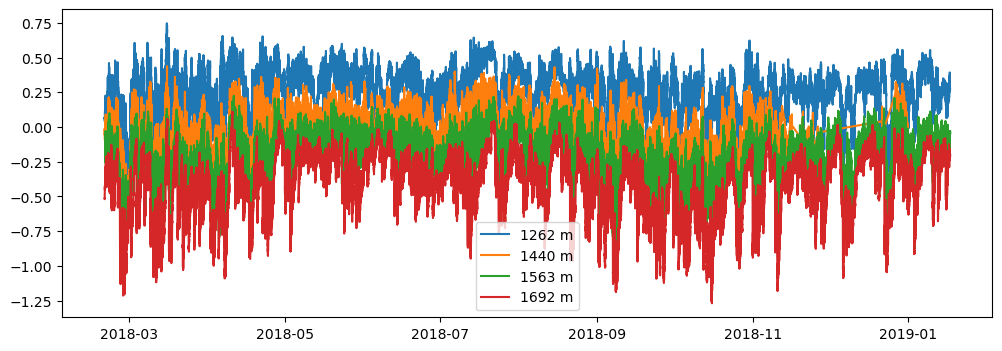

In [16]:
# make some preliminary plots 
fig = plt.figure(figsize=(12,4))

plt.plot(ds_sbe1.time,ds_sbe1.temp, label='1262 m')
plt.plot(ds_sbe2.time,ds_sbe2.temp, label='1440 m')
plt.plot(ds_rbr.time,ds_rbr.temp, label='1563 m')
plt.plot(ds_sbe3.time,ds_sbe3.temp, label='1692 m')
plt.legend()

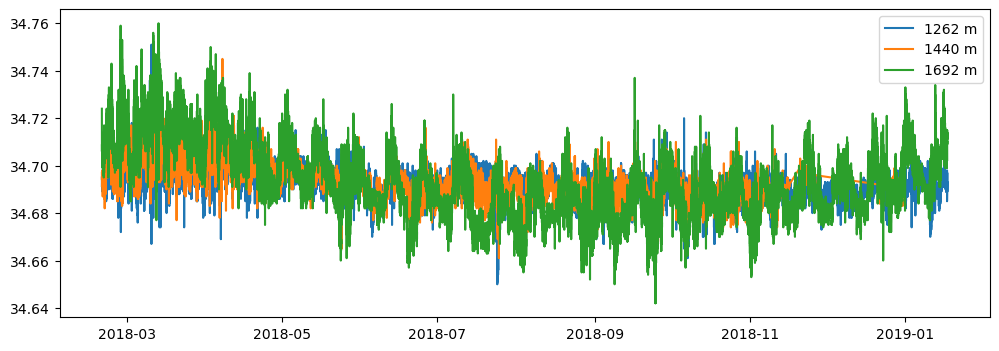

In [48]:
# make some preliminary plots 
fig = plt.figure(figsize=(12,4))

plt.plot(ds_sbe1.time,ds_sbe1.sal, label='1262 m')
plt.plot(ds_sbe2.time,ds_sbe2.sal, label='1440 m')
#plt.plot(ds_rbr.time,ds_rbr.temp, label='1563 m')
plt.plot(ds_sbe3.time,ds_sbe3.sal, label='1692 m')
plt.legend()

Text(0, 0.5, 'Speed, cm/s')

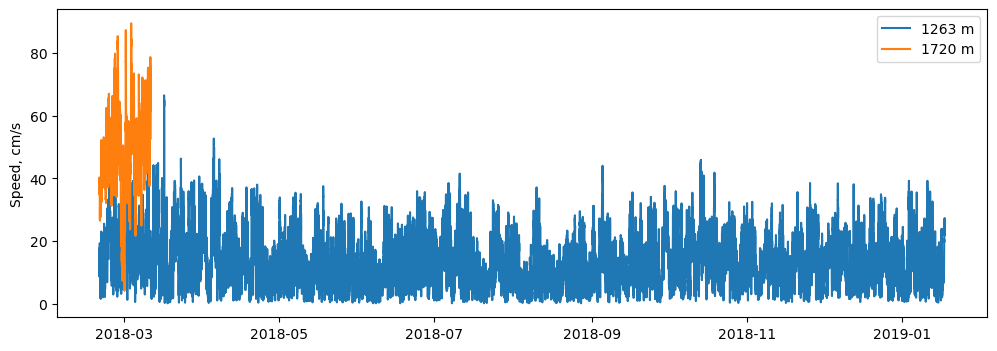

In [52]:
# make some preliminary plots 
fig = plt.figure(figsize=(12,4))

plt.plot(ds_aqd.time,ds_aqd.speed, label='1263 m')
plt.plot(ds_seaguard.time,ds_seaguard.speed, label='1720 m')
#plt.plot(ds_rbr.time,ds_rbr.temp, label='1563 m')
#plt.plot(ds_sbe3.time,ds_sbe3.sal, label='1692 m')
plt.legend()
plt.ylabel('Speed, cm/s')

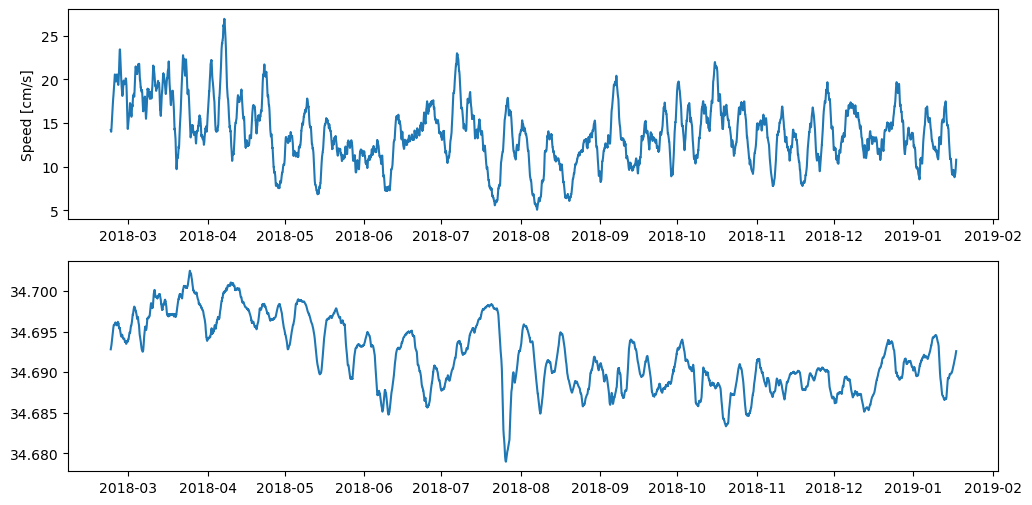

In [17]:
fig = plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.plot(ds_aqd.rolling(time=288).mean().time,ds_aqd.rolling(time=288).mean().speed, label='1263 m')
plt.ylabel('Speed [cm/s]')

plt.subplot(2,1,2)
plt.plot(ds_sbe1.rolling(time=864).mean().time,ds_sbe1.rolling(time=864).mean().sal, label='1262 m')

In [ ]:
# # list of final datasets to save 
# final_datasets = [ds_aqd, ds_sbe1, ds_sbe2, ds_sbe3, ds_seaguard, ds_rbr]
# # list of name strings for each dataset to loop through when saving - format: 'mooringname_year_instrument_depth'
# final_names = ['P2_2018_aqd_1263', 'P2_2018_sbe_1262', 'P2_2018_sbe_1440', 'P2_2018_sbe_1692', 'P2_2018_seaguard_1720', 'P2_2018_rbr_1563']
# # loop through and save each dataset as a netcdf file
# for i in range(len(final_datasets)):
#     final_datasets[i].to_netcdf(path='/Users/mblan/Documents/research/data/mooring/P2/'+final_names[i]+'.nc')

### Mooring P3

In [19]:
# Path for Local work on MAC 
#ds1 = xr.open_dataset('/Users/mackenzie/Documents/Research/PhD/TNB_Research/data/P2_P3_2018/113143.nc')

# Path for DELL 
ds1 = xr.open_dataset('/Users/mblan/Documents/TNB_Research/data/P2_P3_2018/113143.nc')

In [24]:
ds1 = ds1.squeeze()

In [34]:
ds1

<xarray.Dataset> Size: 19MB
Dimensions:               (AQD_c1802RPC1_14295: 31831, c1802RPB1_14296: 31831,
                           SBE37_s1802RPC1_16417: 95487,
                           SBE37_s1802RPC2_16418: 95487,
                           SBE37_s1802RPC3_16419: 95487,
                           SBE56_t1802RPC1_2086: 222833,
                           Seagurad_c1802RPB1_1110: 6)
Dimensions without coordinates: AQD_c1802RPC1_14295, c1802RPB1_14296,
                                SBE37_s1802RPC1_16417, SBE37_s1802RPC2_16418,
                                SBE37_s1802RPC3_16419, SBE56_t1802RPC1_2086,
                                Seagurad_c1802RPB1_1110
Data variables: (12/37)
    lat                   float64 8B ...
    lon                   float64 8B ...
    Instrument_01_Time    (AQD_c1802RPC1_14295) float64 255kB 2.489e+04 ... 2...
    Instrument_01_Press   (AQD_c1802RPC1_14295) float64 255kB 121.8 ... 1.274...
    Instrument_01_Temp    (AQD_c1802RPC1_14295) float64 255kB -0.73 0.51 ... 0.4
    Instrument_01_Speed   (AQD_c1802RPC1_14295) float64 255kB 182.8 10.2 ... 7.0
    ...                    ...
    Instrument_05_Time    (SBE56_t1802RPC1_2086) float64 2MB 2.489e+04 ... 2....
    Instrument_05_Temp    (SBE56_t1802RPC1_2086) float64 2MB 1.164 ... 0.22
    Instrument_06_Time    (Seagurad_c1802RPB1_1110) float64 48B 2.489e+04 ......
    Instrument_06_Tilt    (Seagurad_c1802RPB1_1110) float64 48B 0.0 0.0 ... 0.0
    Instrument_06_Speed   (Seagurad_c1802RPB1_1110) float64 48B 0.0 0.0 ... 0.0
    Instrument_06_dir     (Seagurad_c1802RPB1_1110) float64 48B 102.0 ... 102.0
Attributes:
    Title:          P3 Mooring 2018-2019, Ross Sea Outflow Experiment
    Contact:        Melissa Bowen, m.bowen@auckland.ac.nz
    Creation Time:  27-Aug-2024
    Description:    Location: Ross Sea\nProject Leader: Melissa Bowen\nLatitu...
    Instrument_01:  Instrument Type: Nortek Aquadopp Current Meter (AQD)\nIns...
    Instrument_02:  Instrument Type: Seabird SBE-37\nInstrument Model: mcat\n...
    Instrument_03:  Instrument Type: Seabird SBE-37\nInstrument Model: mcat\n...
    Instrument_04:  Instrument Type: Seabird SBE-37\nInstrument Model: mcat\n...
    Instrument_05:  Instrument Type: Seabird SBE-56\nInstrument Model: sbe56\...
    Instrument_06:  Instrument Type: Aanderaa Seagurad\nInstrument Model: sea...

In [25]:
# Dataset 1: AQD_c1802RPC1_14295

time = convert_time(start_time="1950-01-01T00:00:00",var='Instrument_01_Time',ds=ds1)
time = time.squeeze()

pressure = ds1['Instrument_01_Press']

temp = ds1['Instrument_01_Temp']

speed = ds1['Instrument_01_Speed']

u = ds1['Instrument_01_u']

v = ds1['Instrument_01_v']

direction = ds1['Instrument_01_Dir']

pitch = ds1['Instrument_01_Pitch']

roll = ds1['Instrument_01_Roll']

heading = ds1['Instrument_01_Head_i']

amp1 = ds1['Instrument_01_Amp1']

amp2 = ds1['Instrument_01_Amp2']

amp3 = ds1['Instrument_01_Amp3']

w = ds1['Instrument_01_W']

In [ ]:
# Create new dataset 
# Depth: 1263 m
ds_aqd_P3 = xr.Dataset(
    data_vars = dict(
        pressure=(['time'], pressure.data),
        temp = (['time'], temp.data),
        u = (['time'], u.data),
        v = (['time'],v.data),
        w = (['time'], w.data),
        speed = (['time'], speed.data),
        direction = (['time'],direction.data),
        roll = (['time'], roll.data),
        pitch = (['time'], pitch.data),
        heading = (['time'],heading.data),
        amp1 = (['time'], amp1.data),
        amp2 = (['time'], amp2.data),
        amp3 = (['time'], amp3.data)
    ),
    coords = dict(time=time)
)

# add in description of data in attributes 
ds_aqd_P3.attrs['Description'] = """P3 Mooring 2018-2019, Ross Sea Outflow Experiment, 
Location: Ross Sea,
Project Leader: Melissa Bowen,
Latitude: -71.9181,
Longitude: 172.9265,
Water Depth: 1715 meters,
Start Time: 2018/02/20 UTC+12,
End Time: 2019/01/17 UTC+12,
Instrument Type: Nortek Aquadopp Current Meter (AQD),
Instrument Model: aquadop,
Instrument SN: aquadop 14295,
Depth: 1263 m"""

In [38]:
# Create Dataset 2: SBE37_s1802RPC1_16417
# Depth: 1262 m

time = convert_time(start_time="1950-01-01T00:00:00",var='Instrument_02_Time', ds=ds1)
time = time.squeeze()

ds_sbe1_P3 = xr.Dataset(
    data_vars = dict(
        pressure = (['time'], ds1['Instrument_02_Press'].data),
        temp = (['time'], ds1['Instrument_02_Temp'].data),
        sal = (['time'], ds1['Instrument_02_Sali'].data),
        cond = (['time'], ds1['Instrument_02_Cond'].data)
    ),
    coords = dict(time=time)
)

# add in description of data in attributes
ds_sbe1_P3.attrs['Description'] = """P3 Mooring 2018-2019, Ross Sea Outflow Experiment, 
Location: Ross Sea,
Project Leader: Melissa Bowen,
Latitude: -71.9181,
Longitude: 172.9265,
Water Depth: 1715 meters,
Start Time: 2018/02/20 UTC+12,
End Time: 2019/01/17 UTC+12,
Instrument Type: Seabird SBE-37,
Instrument Model: mcat,
Instrument SN: mcat 16417,
Depth: 1262 m"""

In [40]:
# Create Dataset 2: SBE37_s1802RPC2_16418
# Depth: 1414 m

time = convert_time(start_time="1950-01-01T00:00:00",var='Instrument_03_Time', ds=ds1)
time = time.squeeze()

ds_sbe2_P3 = xr.Dataset(
    data_vars = dict(
        pressure = (['time'], ds1['Instrument_03_Press'].data),
        temp = (['time'], ds1['Instrument_03_Temp'].data),
        sal = (['time'], ds1['Instrument_03_Sali'].data),
        cond = (['time'], ds1['Instrument_03_Cond'].data)
    ),
    coords = dict(time=time)
)

# add in description of data in attributes
ds_sbe2_P3.attrs['Description'] = """P3 Mooring 2018-2019, Ross Sea Outflow Experiment, 
Location: Ross Sea,
Project Leader: Melissa Bowen,
Latitude: -71.9181,
Longitude: 172.9265,
Water Depth: 1715 meters,
Start Time: 2018/02/20 UTC+12,
End Time: 2019/01/17 UTC+12,
Instrument Type: Seabird SBE-37,
Instrument Model: mcat,
Instrument SN: mcat 16418,
Depth: 1414 m"""

In [41]:
# Create Dataset 2: SBE37_s1802RPC3_16419
# Depth: 1667 m

time = convert_time(start_time="1950-01-01T00:00:00",var='Instrument_04_Time', ds=ds1)
time = time.squeeze()

ds_sbe3_P3 = xr.Dataset(
    data_vars = dict(
        pressure = (['time'], ds1['Instrument_04_Press'].data),
        temp = (['time'], ds1['Instrument_04_Temp'].data),
        sal = (['time'], ds1['Instrument_04_Sali'].data),
        cond = (['time'], ds1['Instrument_04_Cond'].data)
    ),
    coords = dict(time=time)
)

# add in description of data in attributes
ds_sbe3_P3.attrs['Description'] = """P3 Mooring 2018-2019, Ross Sea Outflow Experiment, 
Location: Ross Sea,
Project Leader: Melissa Bowen,
Latitude: -71.9181,
Longitude: 172.9265,
Water Depth: 1715 meters,
Start Time: 2018/02/20 UTC+12,
End Time: 2019/01/17 UTC+12,
Instrument Type: Seabird SBE-37,
Instrument Model: mcat,
Instrument SN: mcat 16419,
Depth: 1667 m"""


In [42]:
# Create Dataset 2: SBE56_t1802RPC1_2086
# Depth: Depth: 1498 m

time = convert_time(start_time="1950-01-01T00:00:00",var='Instrument_05_Time', ds=ds1)
time = time.squeeze()

ds_sbe4_P3 = xr.Dataset(
    data_vars = dict(
        temp = (['time'], ds1['Instrument_05_Temp'].data),
    ),
    coords = dict(time=time)
)

# add in description of data in attributes
ds_sbe4_P3.attrs['Description'] = """P3 Mooring 2018-2019, Ross Sea Outflow Experiment, 
Location: Ross Sea,
Project Leader: Melissa Bowen,
Latitude: -71.9181,
Longitude: 172.9265,
Water Depth: 1715 meters,
Start Time: 2018/02/20 UTC+12,
End Time: 2019/01/17 UTC+12,
Instrument Type: Seabird SBE-56,
Instrument Model: sbe56,
Instrument SN: sbe56 2086,
Depth: 1498 m"""


In [43]:
# Create Dataset 5: Seagurad_c1802RPB1_1110
# Depth: 1693 m

time = convert_time(start_time="1950-01-01T00:00:00",var='Instrument_06_Time',ds=ds1)
time = time.squeeze()

ds_seaguard_P3 = xr.Dataset(
    data_vars = dict(
        tilt = (['time'], ds1['Instrument_06_Tilt'].data),
        speed = (['time'], ds1['Instrument_06_Speed'].data),
        direction = (['time'], ds1['Instrument_06_dir'].data),
    ),
    coords = dict(time=time)
)

# add in description of data in attributes
ds_seaguard_P3.attrs['Description'] = """P3 Mooring 2018-2019, Ross Sea Outflow Experiment, 
Location: Ross Sea,
Project Leader: Melissa Bowen,
Latitude: -71.9181,
Longitude: 172.9265,
Water Depth: 1715 meters,
Start Time: 2018/02/20 UTC+12,
End Time: 2019/01/17 UTC+12,
Instrument Type: Aanderaa Seagurad,
Instrument Model: seaguard,
Instrument SN: seaguard 1111,
Depth: 1693 m,
Distance from Bottom: 22 m"""

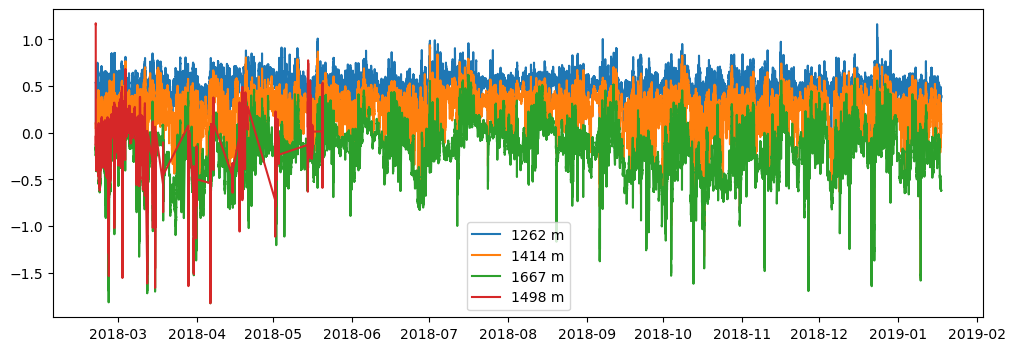

In [32]:
# make some preliminary plots 
fig = plt.figure(figsize=(12,4))

plt.plot(ds_sbe1_P3.time,ds_sbe1_P3.temp, label='1262 m')
plt.plot(ds_sbe2_P3.time,ds_sbe2_P3.temp, label='1414 m')
plt.plot(ds_sbe3_P3.time,ds_sbe3_P3.temp, label='1667 m')
plt.plot(ds_sbe4_P3.time,ds_sbe4_P3.temp, label='1498 m')
plt.legend()

In [ ]:
# # list of final datasets to save 
# final_datasets = [ds_aqd_P3, ds_sbe1_P3, ds_sbe2_P3, ds_sbe3_P3, ds_sbe4_P3, ds_seaguard_P3]
# # list of name strings for each dataset to loop through when saving - format: 'mooringname_year_instrument_depth'
# final_names = ['P3_2018_aqd_1263', 'P3_2018_sbe_1262', 'P3_2018_sbe_1414', 'P3_2018_sbe_1667', 'P3_2018_sbe_1498', 'P3_2018_seaguard_1693']
# # loop through and save each dataset as a netcdf file
# for i in range(len(final_datasets)):
#     final_datasets[i].to_netcdf(path='/Users/mblan/Documents/research/data/mooring/P3/'+final_names[i]+'.nc')

## Preliminary Plotting 